## VGGNet-Z implementation
This is an experimentation with the VGGNet convolutional neural net model for image classification. The dataset being used is the Tiny ImageNet available on the ImageNet website. Though the model is not the state of the art image classifier, the main purpose was to get my hands dirty building a CNN classifier for the Tiny ImageNet dataset(which has a 64x64x3 pixels). I use the Tensorflow framework. Some of the utility functions(cnn_utils) have been loaded from Andrew Ng's Deep Learning specialization's programming assignments.

Python dependencies:
- numpy - to read, store and perform operations on image data
- matplotlib - diagnostics and plotting data
- tensorflow - well, Deep Learning
- cnn_utils - helper functions to load data, create minibatches, predict etc.

In [1]:
import tensorflow as tf
import numpy as np
import math
import matplotlib.pyplot as plt
from cnn_utils import *

In [2]:
def create_placeholders(n_H, n_W, n_C, n_y):
    '''
    Function to create placeholder for tensorflow session
    
    Args:
    n_H = height of the image
    n_W = width of image
    n_C = number of channels
    n_y = number of output features
    
    returns:
    X,Y
    '''
    X = tf.placeholder(tf.float32, shape = (None, n_H, n_W, n_C))
    Y = tf.placeholder(tf.float32, shape = (None, n_y))
    
    return X, Y

In [3]:
# unit test script
X, Y = create_placeholders(64, 64, 3, 6)
print ("X = " + str(X))
print ("Y = " + str(Y))

X = Tensor("Placeholder:0", shape=(?, 64, 64, 3), dtype=float32)
Y = Tensor("Placeholder_1:0", shape=(?, 6), dtype=float32)


In [4]:
def random_mini_batches(X, Y, mini_batch_size = 64, seed = 0):
    """
    Creates a list of random minibatches from (X, Y)
    
    Arguments:
    X -- input data, of shape (input size, number of examples)
    Y -- true "label" vector (1 for blue dot / 0 for red dot), of shape (1, number of examples)
    mini_batch_size -- size of the mini-batches, integer
    
    Returns:
    mini_batches -- list of synchronous (mini_batch_X, mini_batch_Y)
    """
    
    np.random.seed(seed)            # To make your "random" minibatches the same as ours
    m = X.shape[1]                  # number of training examples
    mini_batches = []
        
    # Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[:, permutation].reshape((1,m))

    # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
    num_complete_minibatches = math.floor(m/mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        ### START CODE HERE ### (approx. 2 lines)
        mini_batch_X = shuffled_X[:, (k * mini_batch_size) : ((k + 1) * mini_batch_size)]
        mini_batch_Y = shuffled_Y[:, (k * mini_batch_size) : ((k + 1) * mini_batch_size)]
        ### END CODE HERE ###
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        ### START CODE HERE ### (approx. 2 lines)
        mini_batch_X = shuffled_X[:, (num_complete_minibatches * mini_batch_size) : ]
        mini_batch_Y = shuffled_Y[:, (num_complete_minibatches * mini_batch_size) : ]
        ### END CODE HERE ###
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

In [5]:
def initialize_parameters_VGGZ(parameter_size_dict):
    '''
    Function to initialize weight parameters, which in the case of VGGNet are filters of varying sizes. 
    They are Initialized using the xavier initializer
    
    Args:
    parameter_size_dict: dictonary carrying the sizes of each parameter as a list
    
    returns:
    parameters containing initialized weights
    '''
    tf.set_random_seed(1)
    W1 = tf.get_variable("W1", parameter_size_dict["W1"], initializer = tf.contrib.layers.xavier_initializer(seed = 0))
    W2 = tf.get_variable("W2", parameter_size_dict["W2"], initializer = tf.contrib.layers.xavier_initializer(seed = 0))
    W3 = tf.get_variable("W3", parameter_size_dict["W3"], initializer = tf.contrib.layers.xavier_initializer(seed = 0))
    W4 = tf.get_variable("W4", parameter_size_dict["W4"], initializer = tf.contrib.layers.xavier_initializer(seed = 0))
    W5 = tf.get_variable("W5", parameter_size_dict["W5"], initializer = tf.contrib.layers.xavier_initializer(seed = 0))
    W6 = tf.get_variable("W6", parameter_size_dict["W6"], initializer = tf.contrib.layers.xavier_initializer(seed = 0))
    W7 = tf.get_variable("W7", parameter_size_dict["W7"], initializer = tf.contrib.layers.xavier_initializer(seed = 0))
    W8 = tf.get_variable("W8", parameter_size_dict["W8"], initializer = tf.contrib.layers.xavier_initializer(seed = 0))
    W9 = tf.get_variable("W9", parameter_size_dict["W9"], initializer = tf.contrib.layers.xavier_initializer(seed = 0))
    
    
    parameters = {"W1":W1,
                  "W2":W2,
                  "W3":W3,
                  "W4":W4,
                  "W5":W5,
                  "W6":W6,
                  "W7":W7,
                  "W8":W8,
                  "W9":W9
                 }
    
    return parameters

In [6]:
# unit test script
parameter_size_dict = {"W1":[4,4,3,8], "W2":[2,2,8,16], "W3":[2,2,8,16], "W4":[3,3,8,16], "W5":[3,3,4,12], "W6":[1,2,3,4], "W7":[2,3,4,5], "W8":[1,2,3,4], "W9":[4,5,6,7]}
tf.reset_default_graph()
with tf.Session() as sess_test:
    parameters = initialize_parameters_VGGZ(parameter_size_dict)
    init = tf.global_variables_initializer()
    sess_test.run(init)
    print("W1 = " + str(parameters["W1"].eval()[1,1,1]))
    print("W2 = " + str(parameters["W2"].eval()[1,1,1]))

W1 = [ 0.00131723  0.14176141 -0.04434952  0.09197326  0.14984085 -0.03514394
 -0.06847463  0.05245192]
W2 = [-0.08566415  0.17750949  0.11974221  0.16773748 -0.0830943  -0.08058
 -0.00577033 -0.14643836  0.24162132 -0.05857408 -0.19055021  0.1345228
 -0.22779644 -0.1601823  -0.16117483 -0.10286498]


The model is according to the diagram as shown below. It is a modification of the original VGG model, you can find it here [VGGNet](https://arxiv.org/pdf/1409.1556.pdf). Modified due to the size of the image chips in the Tiny-ImageNet dataset(64x64x3) as opposed to the orginal ImageNet dataset(224x224x3).

![VGGNet-Z](./helper-files/VGGZ.png "VGGNet-Z Model")

In [7]:
def forward_propogation_VGGZ(X, parameters):
    '''
    Function implements the forward propogation for the VGGNet-Z.
    
    Args:
    X - placeholder for the initial feature tensor
    parameters - dictionary containing filters
    
    returns
    Z8 - output of the last LINEAR layer
    
    NOT IMPLEMENTED: Batch Normalization after each convolution unit
    '''
    # retrieve parameters
    W1 = parameters['W1']
    W2 = parameters['W2']
    W3 = parameters['W3']
    W4 = parameters['W4']
    W5 = parameters['W5']
    W6 = parameters['W6']
    W7 = parameters['W7']
    W8 = parameters['W8']
    W9 = parameters['W9']
    
    
    # Conv2d unit -- filter:2x2, stride:1x1, no padding
    # input channels -- 3
    # output channels -- 32
    Z1 = tf.nn.conv2d(X,W1, strides = [1,1,1,1], padding = 'VALID')
    # ReLU activation
    A1 = tf.nn.relu(Z1)
    
    # Conv2d unit -- filters:2x1, stride:1x1, no padding
    # input channels -- 32
    # output channels -- 32
    Z2 = tf.nn.conv2d(A1,W2, strides = [1,1,1,1], padding = 'VALID')
    # ReLU activation
    A2 = tf.nn.relu(Z2)
    
    # Conv2d unit -- filters:1x2, stride 1x1, no padding
    # input channels -- 32
    # output channels -- 32
    Z3 = tf.nn.conv2d(A2,W3, strides = [1,1,1,1], padding = 'VALID')
    # ReLU activation
    A3 = tf.nn.relu(Z3)
    
    # 1st pooling layer
    # Maxpool -- filter:2x2, stride:2x2
    P1 = tf.nn.max_pool(A3, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'VALID')
    
    
    # Conv2d unit -- filter:2x2, stride:1, pad:2
    # input channels -- 32
    # output channels -- 48
    Z4 = tf.nn.conv2d(P1,W4, strides = [1,1,1,1], padding = 'SAME')
    # ReLU activation
    A4 = tf.nn.relu(Z4)
    
    # Conv2d unit -- filters:2x1, stride:1x1, no padding
    # input channels -- 48
    # output channels -- 48
    Z5 = tf.nn.conv2d(A4,W5, strides = [1,1,1,1], padding = 'VALID')
    # ReLU activation
    A5 = tf.nn.relu(Z5)
    
    # Conv2d unit -- filters:1x2, stride 1x1, no padding
    # input channels -- 48
    # output channels -- 48
    Z6 = tf.nn.conv2d(A5,W6, strides = [1,1,1,1], padding = 'VALID')
    # ReLU activation
    A6 = tf.nn.relu(Z6)
    
    # Maxpool -- filter:3x3, stride:2
    P2 = tf.nn.max_pool(A6, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'VALID')
    
    # Conv2d unit -- filter:2x2, stride:1, pad:2
    # input channels -- 48
    # output channels -- 80
    Z7 = tf.nn.conv2d(P2,W7, strides = [1,1,1,1], padding = 'SAME')
    # ReLU activation
    A7 = tf.nn.relu(Z7)
    
    # Conv2d unit -- filters:2x1, stride:1x1, no padding
    # input channels -- 80
    # output channels -- 80
    Z8 = tf.nn.conv2d(A7,W8, strides = [1,1,1,1], padding = 'VALID')
    # ReLU activation
    A8 = tf.nn.relu(Z8)
    
    # Conv2d unit -- filters:1x2, stride 1x1, no padding
    # input channels -- 80
    # output channels -- 80
    Z9 = tf.nn.conv2d(A8,W9, strides = [1,1,1,1], padding = 'VALID')
    # ReLU activation
    A9 = tf.nn.relu(Z9)
    
    P3 = tf.nn.max_pool(A9, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'VALID')
    
    
    # FC1 - 4096 neurons
    P3 = tf.contrib.layers.flatten(P3)
    Z10 = tf.contrib.layers.fully_connected(P3, 200, activation_fn=None)
    
    return Z10

In [8]:
def compute_cost(Z, Y):
    '''
    Computes cost 
    
    Args:
    Z8 -- Logits/Linear output from the last fully connected layer
    Y -- labels corresponding to each example in the batch
    
    Returns:
    cost -- cost of the epoch
    '''
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = Z, labels = Y))
    
    return cost

In [9]:
def model_VGGZ(X_train, Y_train, X_test, Y_test, learning_rate = 0.009,
          num_epochs = 100, minibatch_size = 64, print_cost = True):
    '''
    Implements the VGGNet-Z model for image classification
    
    Args:
    X_train -- training set, of shape (None, 64, 64, 3)
    Y_train -- test set, of shape (None, n_y = 6)
    X_test -- training set, of shape (None, 64, 64, 3)
    Y_test -- test set, of shape (None, n_y = 6)
    learning_rate -- learning rate of the optimization
    num_epochs -- number of epochs of the optimization loop
    minibatch_size -- size of a minibatch
    print_cost -- True to print the cost every 100 epochs
    
    returns:
    train_accuracy -- real number, accuracy on the train set (X_train)
    test_accuracy -- real number, testing accuracy on the test set (X_test)
    parameters -- parameters learnt by the model. They can then be used to predict.
    '''
    # retrieve necessary tensor dimensions and do the necessary initializations
    ops.reset_default_graph()
    (m, n_H0, n_W0, n_C0) = X_train.shape
    n_y = Y_train.shape[1]
    seed = 3
    costs = []
    
    # Create placeholders for the input and output tensors
    X, Y = create_placeholders(n_H0, n_W0, n_C0, n_y)
    
    # create dictionary to assign tensor shapes to the weight filters for VGGNet
    parameter_size_dict = {"W1":[2,2,3,32], "W2":[2,1,32,32], "W3":[1,2,32,32], "W4":[2,2,32,48], "W5":[2,1,48,48], "W6":[1,2,48,48], "W7":[2,2,48,80], "W8":[2,1,80,80], "W9":[1,2,80,80]}
    
    # Initialize parameters
    parameters = initialize_parameters(parameter_size_dict)
    
    # apply forward propogation
    Z = forward_propogation(X, parameters)
    
    # compute cost 
    cost = compute_cost(Z, Y)
    
    # define an optimizer
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
    
    # initialize global variables
    init = tf.global_variables_initializer()
    
    # run the session and train
    with tf.Session() as sess:
        
        # run the session
        sess.run(init)
        
        # training loop
        for epoch in num_epochs:
            
            # split into minibatches
            minibatch_cost = 0.
            num_minibatches = int(m / minibatch_size) # number of minibatches of size minibatch_size in the train set
            seed = seed + 1
            minibatches = random_mini_batches(X_train, Y_train, minibatch_size, seed)
            
            for minibatch in minibatches:
                
                # select a minibatch
                (minibatch_X, minibatch_Y) = minibatch
                
                # computation of the actual graph
                _, temp_cost = sess.run([optimizer, cost], feed_dict={X: minibatch_X, Y: minibatch_Y})
                
                # add the cost
                minibatch_cost += temp_cost / num_minibatches
                
            # Print the cost every epoch
            if print_cost == True and epoch % 5 == 0:
                print ("Cost after epoch %i: %f" % (epoch, minibatch_cost))
            if print_cost == True and epoch % 1 == 0:
                costs.append(minibatch_cost)
                
                
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()

    # Calculate the correct predictions
    predict_op = tf.argmax(Z, 1)
    correct_prediction = tf.equal(predict_op, tf.argmax(Y, 1))

    # Calculate accuracy on the test set
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print(accuracy)
    train_accuracy = accuracy.eval({X: X_train, Y: Y_train})
    test_accuracy = accuracy.eval({X: X_test, Y: Y_test})
    print("Train Accuracy:", train_accuracy)
    print("Test Accuracy:", test_accuracy)

    return train_accuracy, test_accuracy, parameters

I use the Tiny ImageNet dataset. The data pruning has been done in another notebook. I have created hdf5 files for both the training and test datasets. Now, I'll go ahead and load these datasets into memory, play around with it in the next few cells and see if the data is proper. After that, I'll train it on the model.

In [10]:
train_path = './data/train_Tiny_ImageNet.hdf5'
test_path = './data/test_val_Tiny_ImageNet.hdf5'
X_train_orig, Y_train_orig, X_val_orig, Y_val_orig, X_test_orig = load_dataset(train_path, test_path)

In [14]:
print(X_train_orig.shape)
print(Y_train_orig.shape)
print(X_val_orig.shape)
print(Y_val_orig.shape)
print(X_test_orig.shape)

(100000, 64, 64, 3)
(100000, 200)
(10000, 64, 64, 3)
(10000, 200)
(10000, 64, 64, 3)


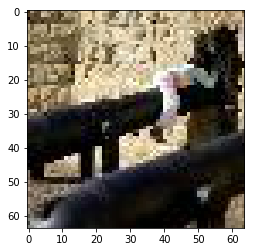

In [15]:
index = 6
plt.imshow(X_train_orig[index])